In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
from code.geo import *
import matplotlib.pyplot as plt

In [11]:

citycenter = (37.77, -122.454)
print 'SEDAC res: 2.5 arcmin = ', 2.5/60, 'degrees'

d = 16000
print 'in distance: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

d = 500
print 'walkscore res: %d feet = %6.4f degrees = %3.2f miles' % (d, distance_to_angle(citycenter, d, 0)[0], d/5280.)

SEDAC res: 2.5 arcmin =  0.0416666666667 degrees
in distance: 16000 feet = 0.0439 degrees = 3.03 miles
walkscore res: 500 feet = 0.0014 degrees = 0.09 miles


(100, 6)


,nodex,nodey,f1,f2,f3,f4
0,1,1,0,1,0,0
1,2,1,0,1,0,0
2,3,1,0,1,0,0
3,4,1,0,1,0,0
4,5,1,0,1,0,0


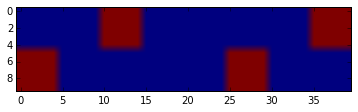

In [12]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]
gdf['f2'] = np.r_[np.tile(np.repeat([1,0], [5,5]), 5), np.zeros(50)]
gdf['f3'] = np.r_[np.zeros(50), np.tile(np.repeat([0,1], [5,5]), 5)]
gdf['f4'] = np.r_[np.zeros(50), np.tile(np.repeat([1,0], [5,5]), 5)]

print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()


In [13]:
np.r_[np.tile(np.repeat([0,1], [5,5]), 5), np.zeros(50)]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
def find_neib(x, y):
    neibs = [[x + 1, y],
             [x - 1, y],
             [x, y + 1],
             [x, y - 1]]
    return np.array(neibs)
find_neib(2, 2)

array([[3, 2],
       [1, 2],
       [2, 3],
       [2, 1]])

In [15]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(400, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [16]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(360, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [17]:
def dist(x1, y1, x2, y2, features):
    f1 = features[(features.nodex == x1) & (features.nodey == y1)].iloc[:,2:]
    f2 = features[(features.nodex == x2) & (features.nodey == y2)].iloc[:,2:]
    
    f1 = np.array(f1).flatten()
    f2 = np.array(f2).flatten()
    return np.linalg.norm(f1-f2)

print dist(1, 1, 2, 1, gdf)
print dist(1, 1, 1, 6, gdf)
    

0.0
1.41421356237


In [18]:
distances = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[distances != 0]

,nodex,nodey,neibx,neiby
11,5,1,6,1
15,6,1,5,1
43,5,2,6,2
48,6,2,5,2
81,5,3,6,3
86,6,3,5,3
119,5,4,6,4
124,6,4,5,4
143,1,5,1,6
147,2,5,2,6


# single feature, 4 valued

(144, 3)


,nodex,nodey,f1
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,1,0


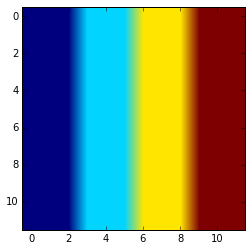

In [19]:
coords = np.arange(1, 13)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

gdf['f1'] = np.repeat([0, 1, 2, 3], [36, 36, 36, 36])


print gdf.shape
plt.imshow(pd.pivot_table(gdf, index='nodex', columns='nodey'))
gdf.head()

In [20]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(576, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [21]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(528, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [89]:
edges['distances'] = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf), axis=1)
edges[edges.distances != 0]

,nodex,nodey,neibx,neiby,distances
0,1,1,2,1,1.135782
1,1,1,1,2,10.006998
2,2,1,3,1,1.044031
3,2,1,1,1,1.135782
4,2,1,2,2,10.010494
5,3,1,4,1,1.029563
6,3,1,2,1,1.044031
7,3,1,3,2,10.003499
8,4,1,5,1,1.191638
9,4,1,3,1,1.029563


# geo-spatial clustering using iris dataset

In [90]:
from sklearn import datasets
iris = datasets.load_iris()
idf = pd.DataFrame(iris.data)
idf.columns = ['f1', 'f2', 'f3', 'f4']
idf['target'] = iris.target
print idf.shape
idf.head()

(150, 5)


,f1,f2,f3,f4,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


(100, 2)
(100, 8)
(100, 6)


,nodex,nodey,index,f1,f2,f3,f4,target
0,1,1,0,5.1,3.5,1.4,0.2,0
1,2,1,1,4.9,3.0,1.4,0.2,0
2,3,1,2,4.7,3.2,1.3,0.2,0
3,4,1,3,4.6,3.1,1.5,0.2,0
4,5,1,4,5.0,3.6,1.4,0.2,0


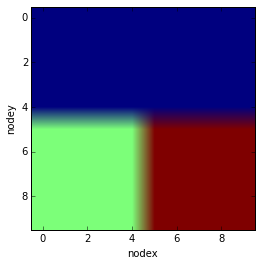

In [91]:
coords = np.arange(1, 11)
g = np.meshgrid(coords, coords)

gdf = pd.DataFrame({'nodex': g[0].ravel(), 'nodey': g[1].ravel()})

d = idf[idf.target == 0]
d.reindex(np.random.permutation(d.index))
d2 = idf[idf.target == 1][:25]
d3 = idf[idf.target == 2][:25]

for i in xrange(5, 26, 5):
    d = pd.concat([d, d2[i-5:i], d3[i-5:i]])
#d = pd.DataFrame(np.array(d))
d.reset_index(inplace=True)
d.drop('index', axis=1)


print gdf.shape
gdf = pd.concat([gdf, d], axis=1)
    

print gdf.shape
print d.shape
plt.imshow(pd.pivot_table(gdf, columns='nodex', index='nodey', values='target'))
plt.xlabel('nodex')
plt.ylabel('nodey')
gdf.head()

In [92]:
edges = pd.DataFrame()

for row in gdf.index:
    x = gdf.iloc[row, 0]
    y = gdf.iloc[row, 1]
    neib = find_neib(x, y)
    newdf = np.vstack((x*np.ones(4),
                       y*np.ones(4),
                       neib.T)).T
    edges = pd.concat((edges, pd.DataFrame(newdf)))
edges.columns = ['nodex', 'nodey', 'neibx', 'neiby']

print edges.shape
edges.head()

(400, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,0,1
2,1,1,1,2
3,1,1,1,0
0,2,1,3,1


In [93]:
# drop non-existent points
edges = edges[edges.neibx.apply(lambda x: x in coords)]
edges = edges[edges.neiby.apply(lambda x: x in coords)]
edges.index = np.arange(0, edges.shape[0])
print edges.shape
edges.head()

(360, 4)


,nodex,nodey,neibx,neiby
0,1,1,2,1
1,1,1,1,2
2,2,1,3,1
3,2,1,1,1
4,2,1,2,2


In [98]:
edges['distances'] = edges.apply(lambda x: dist(x.nodex, x.nodey, x.neibx, x.neiby, gdf.drop('target', axis=1)), axis=1)
edges['meanx'] = edges.nodex/2. + edges.neibx/2.
edges['meany'] = edges.nodey/2. + edges.neiby/2.

edges

,nodex,nodey,neibx,neiby,distances,meanx,meany
0,1,1,2,1,1.135782,1.5,1.0
1,1,1,1,2,10.006998,1.0,1.5
2,2,1,3,1,1.044031,2.5,1.0
3,2,1,1,1,1.135782,1.5,1.0
4,2,1,2,2,10.010494,2.0,1.5
5,3,1,4,1,1.029563,3.5,1.0
6,3,1,2,1,1.044031,2.5,1.0
7,3,1,3,2,10.003499,3.0,1.5
8,4,1,5,1,1.191638,4.5,1.0
9,4,1,3,1,1.029563,3.5,1.0


<matplotlib.colorbar.Colorbar instance at 0x11275fb00>

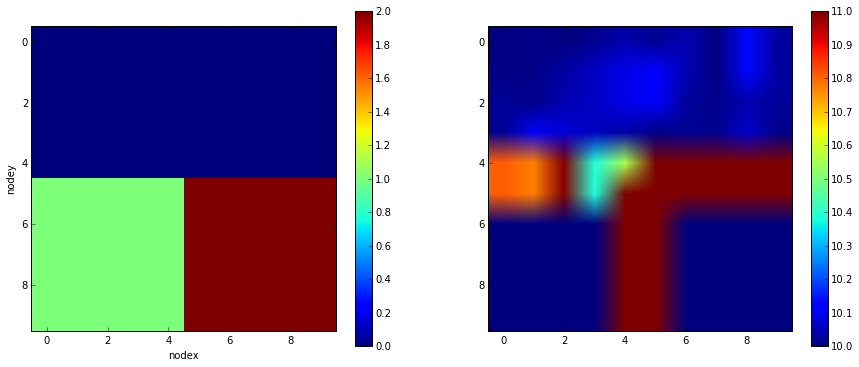

In [117]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(pd.pivot_table(gdf, columns='nodex', index='nodey', values='target'),
          interpolation='nearest')
plt.colorbar()
plt.xlabel('nodex')
plt.ylabel('nodey')

plt.subplot(122)
plt.imshow(pd.pivot_table(edges, columns='nodex', index='nodey', values='distances',
                          aggfunc='max'), clim=(10, 11))
plt.xlabel('nodex')
plt.ylabel('nodey')
plt.colorbar()

In [96]:
edges[(edges.nodex<5) & (edges.nodey==5)]

,nodex,nodey,neibx,neiby,distances
142,1,5,2,5,1.640122
143,1,5,1,6,10.810180
144,1,5,1,4,10.014989
145,2,5,3,5,1.352775
146,2,5,1,5,1.640122
147,2,5,2,6,10.774971
148,2,5,2,4,10.102970
149,3,5,4,5,1.303840
150,3,5,2,5,1.352775
151,3,5,3,6,10.995908


In [105]:
edges[edges.distances < 46].sort('distances', ascending=False)

,nodex,nodey,neibx,neiby,distances,meanx,meany
190,3,6,3,5,10.995908,3.0,5.5
151,3,5,3,6,10.995908,3.0,5.5
182,1,6,1,5,10.810180,1.0,5.5
143,1,5,1,6,10.810180,1.0,5.5
147,2,5,2,6,10.774971,2.0,5.5
186,2,6,2,5,10.774971,2.0,5.5
159,5,5,5,6,10.557462,5.0,5.5
198,5,6,5,5,10.557462,5.0,5.5
155,4,5,4,6,10.389418,4.0,5.5
194,4,6,4,5,10.389418,4.0,5.5


In [104]:
edges[edges.nodey>4]

,nodex,nodey,neibx,neiby,distances,meanx,meany
142,1,5,2,5,1.640122,1.5,5.0
143,1,5,1,6,10.810180,1.0,5.5
144,1,5,1,4,10.014989,1.0,4.5
145,2,5,3,5,1.352775,2.5,5.0
146,2,5,1,5,1.640122,1.5,5.0
147,2,5,2,6,10.774971,2.0,5.5
148,2,5,2,4,10.102970,2.0,4.5
149,3,5,4,5,1.303840,3.5,5.0
150,3,5,2,5,1.352775,2.5,5.0
151,3,5,3,6,10.995908,3.0,5.5
